In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops

In [45]:
img=cv2.imread("236037.jpg")
pimg=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

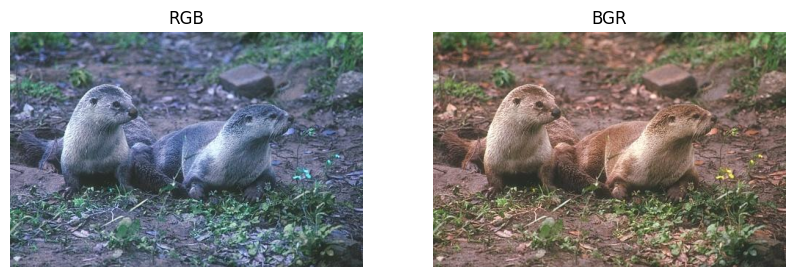

In [46]:
fig=plt.figure(figsize=(10,10)) # specifying the overall grid size
fig.add_subplot(2, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("RGB")
fig.add_subplot(2, 2, 2)
plt.imshow(pimg)
plt.axis('off')
plt.title("BGR")
plt.show()

In [47]:
mask = np.zeros([321,481,3],dtype=np.uint8)
mask.fill(1) 

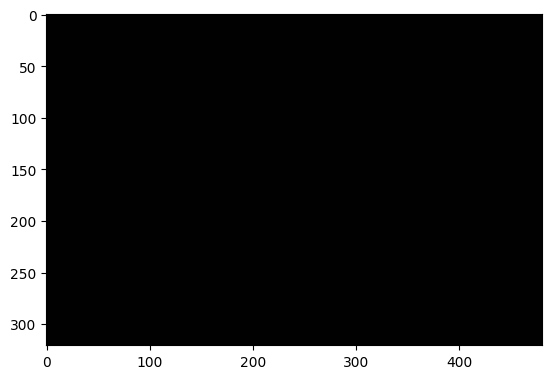

In [48]:
plt.imshow(mask)

In [49]:
for i in range(90,230):
    for j in range(180,400):
        mask[i][j][0]=255
        mask[i][j][1]=255
        mask[i][j][2]=255

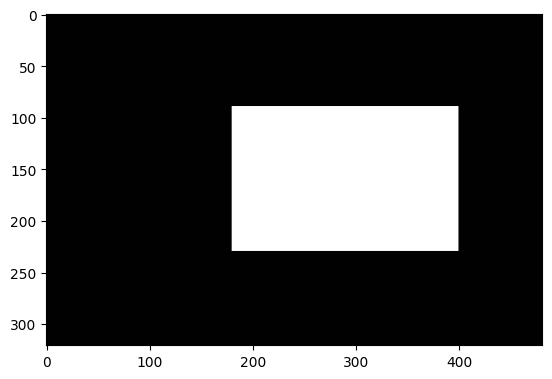

In [50]:
plt.imshow(mask)

In [51]:
mask=Image.fromarray(mask)
img=Image.fromarray(img)

In [52]:
anml1 = ImageChops.multiply(mask, img)

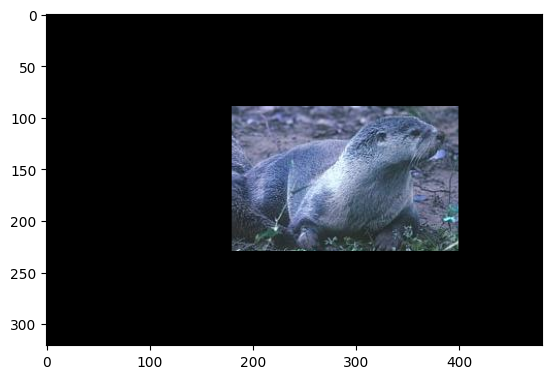

In [53]:
plt.imshow(anml1)

In [54]:
from numpy import asarray
anml1=asarray(anml1)
anml1_gray = cv2.cvtColor(anml1, cv2.COLOR_BGR2GRAY)

anml1_blur = cv2.GaussianBlur(anml1_gray, (5,5), 0) 
anml1_blur = cv2.GaussianBlur(anml1_blur, (5,5), 3) 

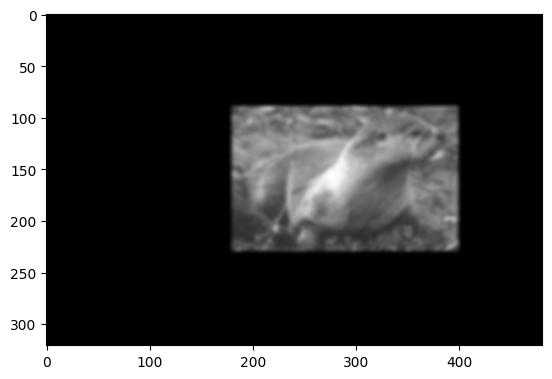

In [55]:
plt.imshow(anml1_blur, cmap='gray')

In [56]:
otsu_thresh, _ = cv2.threshold(anml1_blur, 0, 255, cv2.THRESH_OTSU)

otsu_thresh=np.median(anml1_blur)

In [57]:
otsu_thresh

59.0

In [58]:
sigma=0.34
low=(1-sigma)*otsu_thresh
upp=(1+sigma)*otsu_thresh

In [59]:
low

38.94

In [60]:
upp

79.06

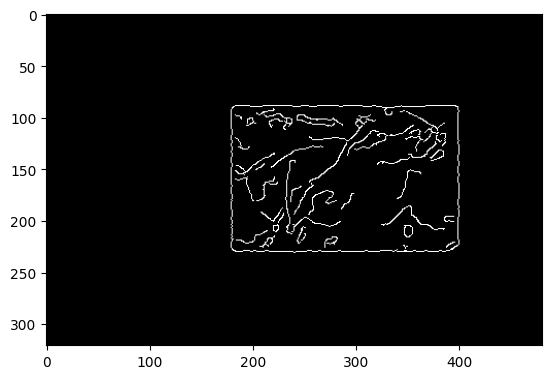

In [61]:
edges = cv2.Canny(image=anml1_blur, threshold1=low  , threshold2=upp  , apertureSize=3 , L2gradient=True) 
plt.imshow(edges, cmap="gray")

In [62]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [63]:
for i in range(180,400):
    edges[90][i]=0
    edges[89][i]=0
    edges[229][i]=0
    edges[230][i]=0
for i in range(90,230):
    edges[i][180]=0
    edges[i][179]=0
    edges[i][400]=0
    edges[i][399]=0

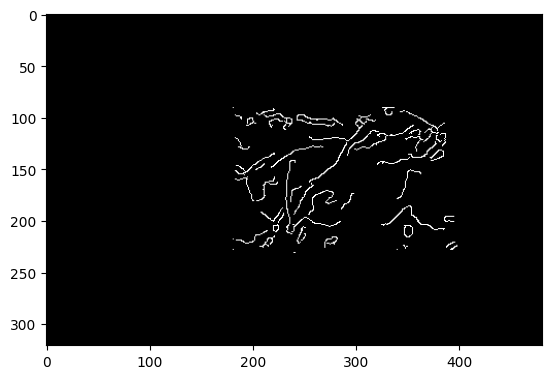

In [64]:
plt.imshow(edges, cmap="gray")

In [65]:
crop = edges[100:150, 350:400] 

In [66]:
crop

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

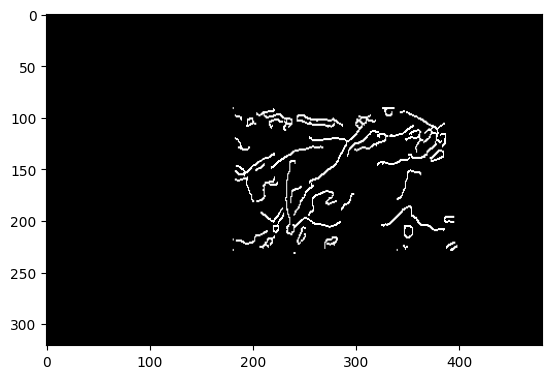

In [90]:
kernel = np.array([1,1])
img_dilation = cv2.dilate(edges, kernel, iterations=1)
plt.imshow(img_dilation, cmap="gray")

#kernel = np.ones((5, 5), np.uint8)
kernel = np.array([1,1])
img_erosion = cv2.erode(edges, kernel, iterations=1)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)

plt.imshow(img_dilation, cmap="gray")

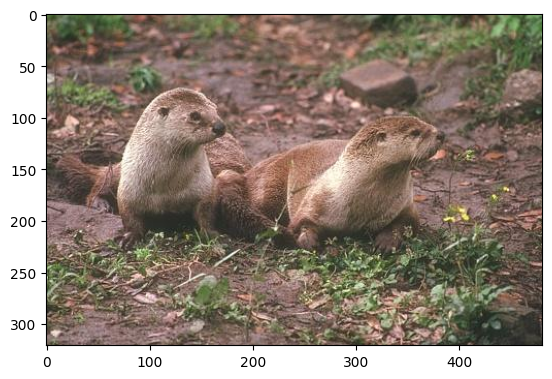

In [69]:
plt.imshow(pimg)

In [70]:
mask = np.zeros([321,481,3],dtype=np.uint8)
mask.fill(1) 

In [71]:
for i in range(60,230):
    for j in range(60,200):
        mask[i][j][0]=255
        mask[i][j][1]=255
        mask[i][j][2]=255

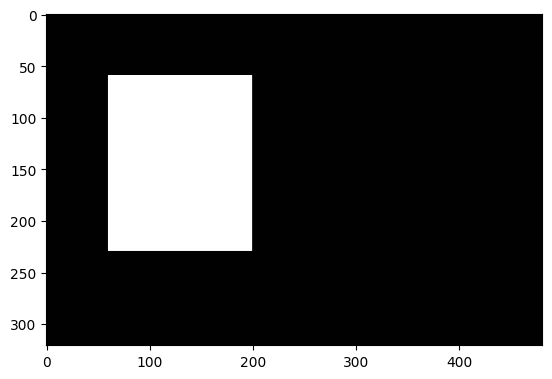

In [72]:
plt.imshow(mask)

In [73]:
mask=Image.fromarray(mask)
#img=Image.fromarray(img)

In [74]:
anml2 = ImageChops.multiply(mask, img)

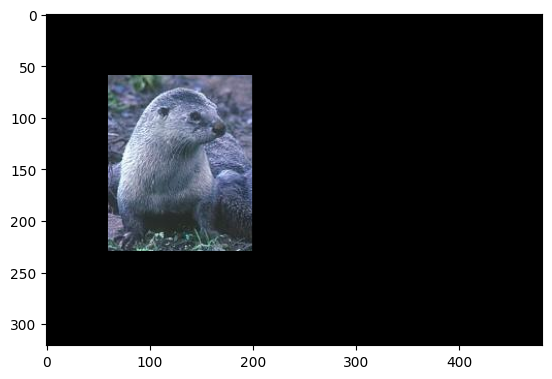

In [75]:
plt.imshow(anml2)

In [76]:
from numpy import asarray
anml2=asarray(anml2)
anml2_gray = cv2.cvtColor(anml2, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
anml2_blur = cv2.GaussianBlur(anml2_gray, (5,5), 0) 
anml2_blur = cv2.GaussianBlur(anml2_blur, (5,5), 3) 

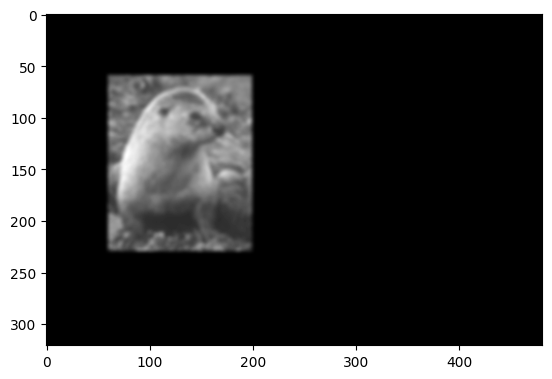

In [77]:
plt.imshow(anml2_blur, cmap='gray')

In [78]:
otsu_thresh, _ = cv2.threshold(anml2_blur, 0, 255, cv2.THRESH_OTSU)

In [79]:
otsu_thresh

59.0

In [80]:
sigma=0.34
low=(1-sigma)*otsu_thresh
upp=(1+sigma)*otsu_thresh

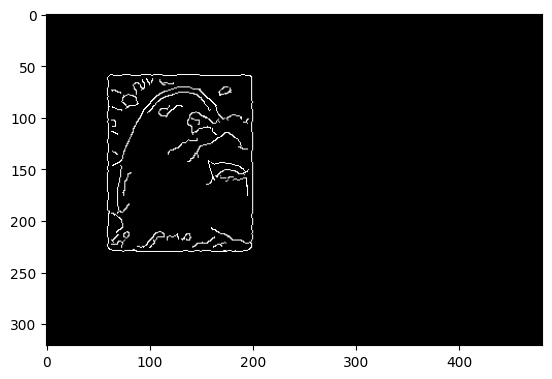

In [81]:
edges2 = cv2.Canny(image=anml2_blur, threshold1=low  , threshold2=upp  , apertureSize=3 , L2gradient=True) 
plt.imshow(edges2, cmap="gray")

In [82]:
for i in range(60,200):
    edges2[60][i]=0
    edges2[59][i]=0
    edges2[229][i]=0
    edges2[230][i]=0
for i in range(60,230):
    edges2[i][60]=0
    edges2[i][59]=0
    edges2[i][200]=0
    edges2[i][199]=0

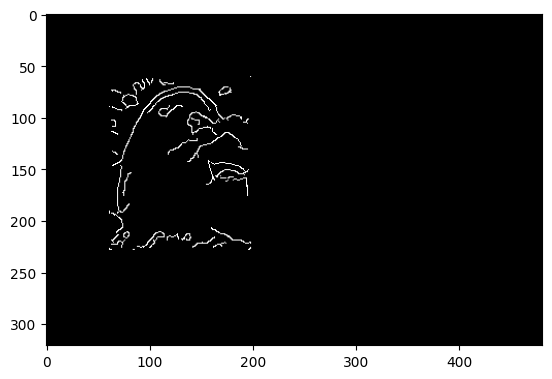

In [83]:
plt.imshow(edges2, cmap="gray")

In [84]:
kernel = np.array([255,255])
img_dilation2 = cv2.dilate(edges2, kernel, iterations=1)

In [85]:
type(img)

PIL.Image.Image

In [91]:
img=np.array(img)
edges2=np.array(edges2)
for i in range(321):
    for j in range(481):
        if img_dilation[i][j]==255 or img_dilation2[i][j]:
            img[i][j][0]=0
            img[i][j][1]=255
            img[i][j][2]=0
    

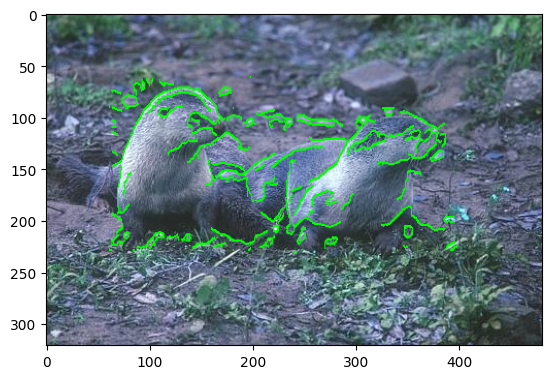

In [92]:
plt.imshow(img)